In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

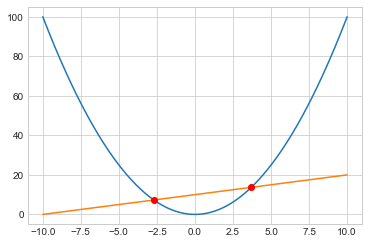

In [27]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = np.linspace(-10, 10, 1000)

ax.plot(x, x**2);
plt.plot(x, x + 10, linestyle='solid')

def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x : fun1(x) - fun2(x),x0)

f = lambda x : x**2
g = lambda x : x+10

x0 = findIntersection(f,g,10.0)
x1 = findIntersection(f,g,0)

plt.plot(x0,x0+10,'ro')
plt.plot(x1,x1+10,'ro')
plt.show()

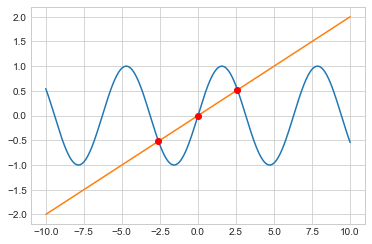

In [96]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-10, 10, 1000)
ax.plot(x, np.sin(x));
plt.plot(x, 0.2*x, linestyle='solid')

f = lambda x : np.sin(x)
g = lambda x : 0.2*x

x0 = findIntersection(f,g,3)
x1 = findIntersection(f,g,0)
x3 = findIntersection(f,g,-2)


plt.plot(x0,0.2*x0,'ro')
plt.plot(x1,0.2*x1,'ro')
plt.plot(x3,0.2*x3,'ro')



plt.show()

In [32]:
import cvxpy as cp
from cvxpy import log

# A scalar variable.
a = cp.Variable()

# Vector variable with shape (5,).
x = cp.Variable(5)

# Matrix variable with shape (5, 1).
x = cp.Variable((5, 1))

# Matrix variable with shape (4, 7).
A = cp.Variable((4, 7))

In [38]:
# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
optimal_x = round(float(x.value),5)
optimal_y = round(float(y.value),5)
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {optimal_x} , y = {optimal_y} ")
print(f"optimal var precise : x = {x.value} , y = {y.value} ")

status: optimal
optimal value 1.0
optimal var: x = 1.0 , y = 0.0 
optimal var precise : x = 1.0 , y = 1.570086213240983e-22 


In [41]:
import math 

print("\nPROBLEM: ")
print("Three cakes have to be divided among 2 people with values:")
print("2 3 4")
print("8 7 6")

# Define x,y,z = the fraction of each region given to player 1.
x = cvxpy.Variable()
y = cvxpy.Variable()
z = cvxpy.Variable()

print("\nMaximize the sum of logs:")
prob = cvxpy.Problem(
    objective   =  cvxpy.Maximize(log(2*x + 3*y + 4*z) + log(8*(1-x)+7*(1-y)+6*(1-z))),
    constraints = [0 <= x, x <= 1, 0<= y , y <= 1, 0 <= z, z <= 1])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal product", math.exp(prob.value))
print("optimal x", round(float(x.value),5))
print("optimal y", round(float(y.value),5))
print("optimal z", round(float(z.value),5))


PROBLEM: 
Three cakes have to be divided among 2 people with values:
2 3 4
8 7 6

Maximize the sum of logs:
status: optimal
optimal value 4.150102096431418
optimal product 63.44047701380348
optimal x 0.0
optimal y 0.40476
optimal z 1.0


In [42]:
x = cp.Variable()

# An infeasible problem.
prob = cp.Problem(cp.Minimize(x), [x >= 1, x <= 0])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

# An unbounded problem.
prob = cp.Problem(cp.Minimize(x))
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: infeasible
optimal value inf
status: unbounded
optimal value -inf
